# ipynb_snippets
> This notebook & webpage (depending on how you're access it) contains a quick reference for python code to do various things. See the legend on the right to jump to a section.
- skip_exec: true

The notebook book contains yada yada yada. It is the philosophy to have all the snippets in the notebook work, with needed data being present in mjwt repo. In some cases this might not possible.

# Some brief notes:

- [Hamel's blog for inspiration](https://hamel.dev/notes/linux/bash_scripting.html)
- some person's homepage https://www.mm218.dev/

<b> Todo dump: </b>

- pd.set_option('display.float_format', lambda x: '%.3f' % x)
- vars(obj) method decorator .. 
    - have everythign present in e.g. .fit() without having to this=self.this; that=self.that etc
    - have same thing for the output state/for iters
    
- ramgb() function in tools?
- make ~/cmd commands avail in mjwt?

Oke this is a bunch of test text

In [ ]:
%%javascript 
document.title='ipynb_snips' // this is usefull for renaming tab like in jupyter

<IPython.core.display.Javascript object>

In [ ]:
# Update the req. file for docker
!pip freeze > /home/jovyan/proj/docker/jupyter-base-ds/requirements.txt
!git config --global user.email "" 
!git config --global user.name  "Menno Witteveen"
!git -C /home/jovyan/proj/docker/jupyter-compbio-ds/ add requirements.txt
# !git -C /home/jovyan/proj/docker/jupyter-base-ds/ status
!git -C /home/jovyan/proj/docker/jupyter-compbio-ds/ commit -m "update req.txt with line_profiler"

In [ ]:
# 'ff'

# Imports

In [ ]:
%config Completer.use_jedi = False
########################################################
## Base Imports:

# Sys Imports:
import time, sys, os

# Standard Imports:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, linalg

#########################################################
## Experiment Specific Imports

# Logistics Imports:
import inspect, glob, re, contextlib, pickle, functools, warnings #,submitit #pyreadr
from contextlib import suppress; from tqdm.auto import tqdm
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from mjwt.utils import jobinfo, corr, implot, sizegb, psrc, beep, Timer, Struct as mStruct

# ML Imports:
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import BayesianRidge # Just to have model around
from scipy.stats import pearsonr, spearmanr

# Genomics Imports:
import pysnptools as pst
from pysnptools.snpreader import Bed, Pheno, SnpHdf5, SnpData
from pysnptools.pstreader import PstData, PstHdf5, PstReader
from lambdapred.utils import load_bimfam

########################################################
## Configuration & Initialisation

# Display Configuration:
from IPython.display import set_matplotlib_formats, display, HTML, Javascript
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('max_colwidth', 200) 
# pd.set_option('display.max_colwidth', None) # No pd trunkation (radical)
# display(HTML("<style>.container { width:75% !important; }</style>"))
# pd.reset_option('all')

# Initializations & Extensions:
timer = Timer(); toc = timer.toc; tic = timer.tic; tic(''); log=np.log10 #p.s. not easy to make it tic;time.sleep(2);toc
notebook = False  if '__file__' in locals() else True
with contextlib.suppress(Exception): os.environ["OMP_NUM_THREADS"] = str(int(os.environ['SLURM_JOB_CPUS_PER_NODE']) - 1)
with contextlib.suppress(BaseException): # non-essential import for`b development.
    get_ipython().run_line_magic('load_ext', 'line_profiler')

In [ ]:
# !pip install torch

In [ ]:
# tqdm

# Data Viz & Exporation

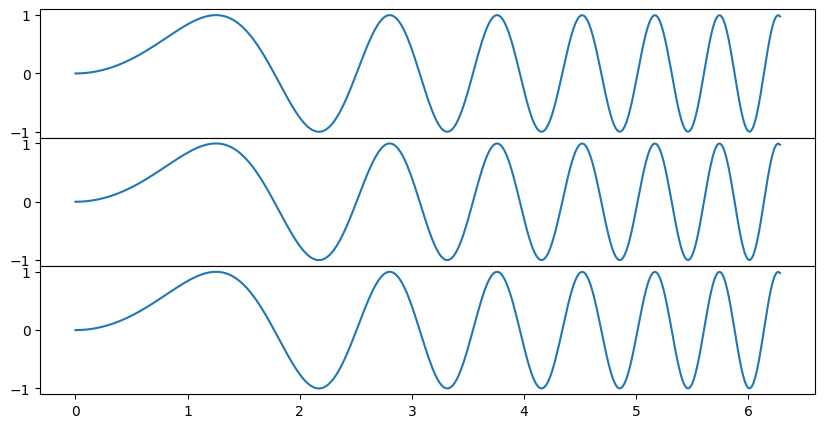

In [ ]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

subplots_adjust(hspace=0.000)
number_of_subplots=3

for i,v in enumerate(range(number_of_subplots)):
    v = v+1
    ax1 = subplot(number_of_subplots,1,v)
    ax1.plot(x,y)

plt.show()

/tmp/ipykernel_84492/1749909219.py:15: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(sp.arange(len(df.columns)),df.columns,rotation=90)
/tmp/ipykernel_84492/1749909219.py:16: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.yticks(sp.arange(len(df.columns)),df.columns,rotation=0)


<matplotlib.colorbar.Colorbar>

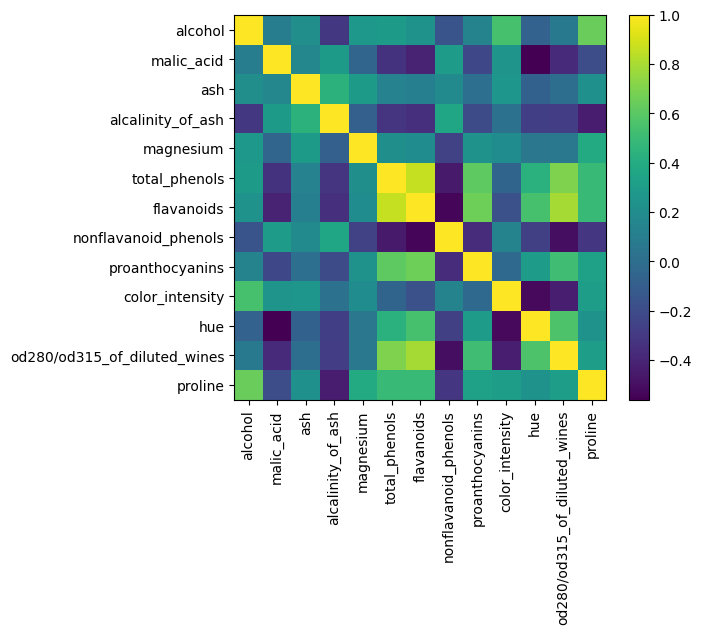

In [ ]:
## Approaches to load data (quickly):

# Some wine:
from sklearn.datasets import load_wine
wine_dt = load_wine()
wine_df = pd.DataFrame(wine_dt['data'],columns=wine_dt['feature_names'])
# display(wine_df.sample(3))
# Selecting wine as general df
df = wine_df

plt.figure(figsize=[6,5])
# Ce = sp.cov(df.values.T)
C = df.corr().values
plt.imshow(C,aspect='auto',interpolation='none')
plt.xticks(sp.arange(len(df.columns)),df.columns,rotation=90)
plt.yticks(sp.arange(len(df.columns)),df.columns,rotation=0)
plt.colorbar()

<Axes: >

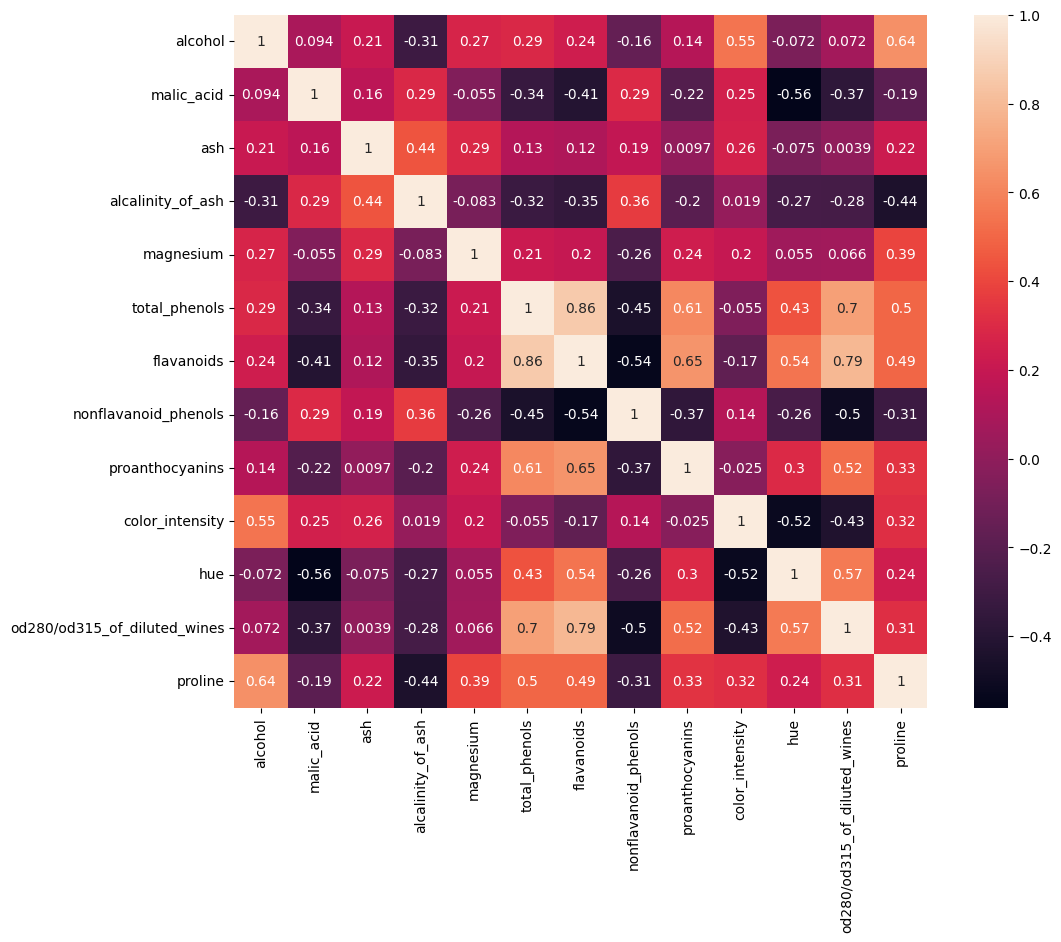

In [ ]:
# the plt.figure is unfortunately needed if one needs to spec. figsize
plt.figure(figsize=(12, 9)); sns.heatmap(df.corr(), square=True, annot=True) 

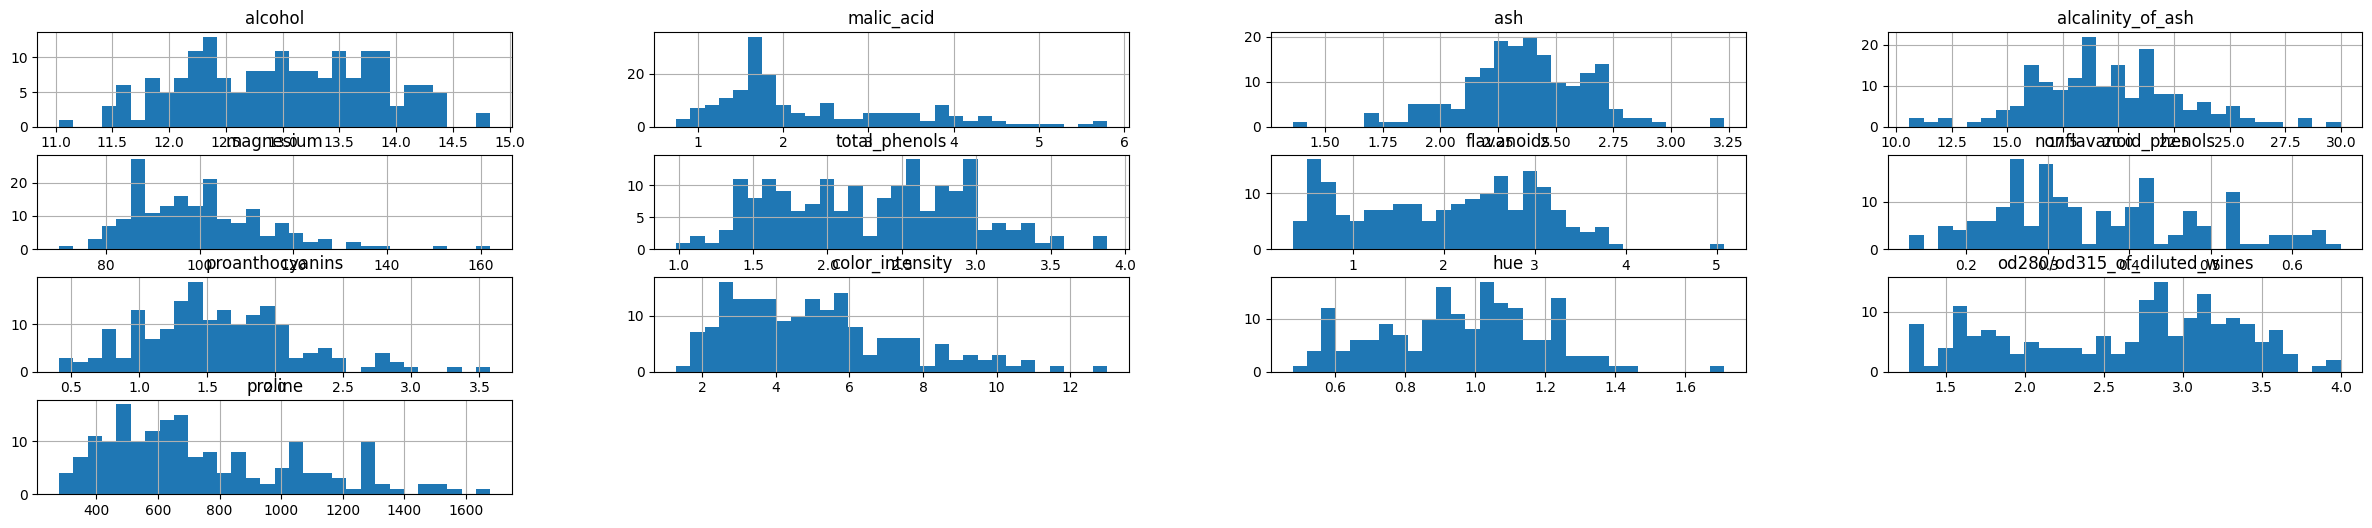

In [ ]:
df.hist(bins=30, figsize=(30,6));

## Matplotlib tricks

(0.0, 10.0, 25.0, 250.0)

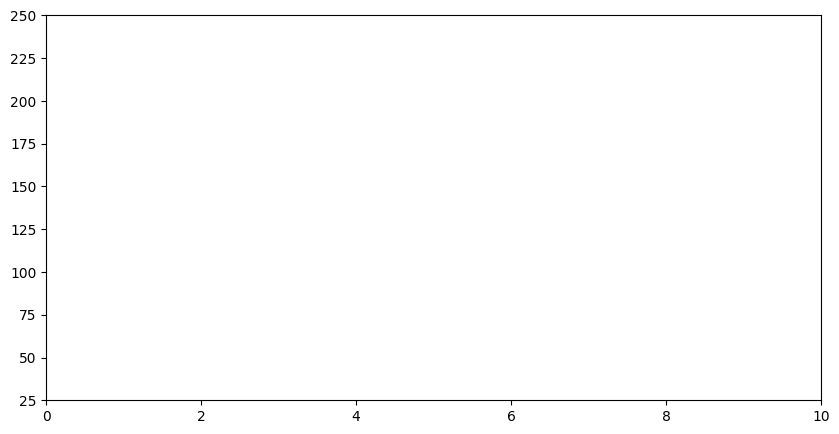

In [ ]:
# Use this to modifier your axis to your hearts contend:
plt.ylim(-2, 2)
plt.xlim(0,10)

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,25,250))


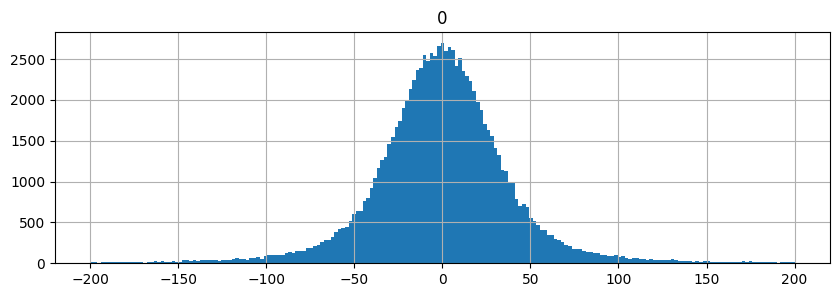

In [ ]:
## Hairy fat-tailed distribution?: Use a linspace to set the buckets of a histogram nicely:
n = 10**5; 
stds = np.sqrt(1/np.random.rand(n)*400);
ws = pd.DataFrame(np.random.randn(n)*stds) # Rather weird fat-tailed weight distribution:
ws.hist(bins=np.linspace(-200,200,200), figsize=[10,3]); # <-- without the bins argument this is a mess

## Pandas 

In [ ]:
# Load coef_df
coef_df = pd.read_hdf('coef_df.h5','coef_df')

<Axes: xlabel='ga_totdays', ylabel='mat_age'>

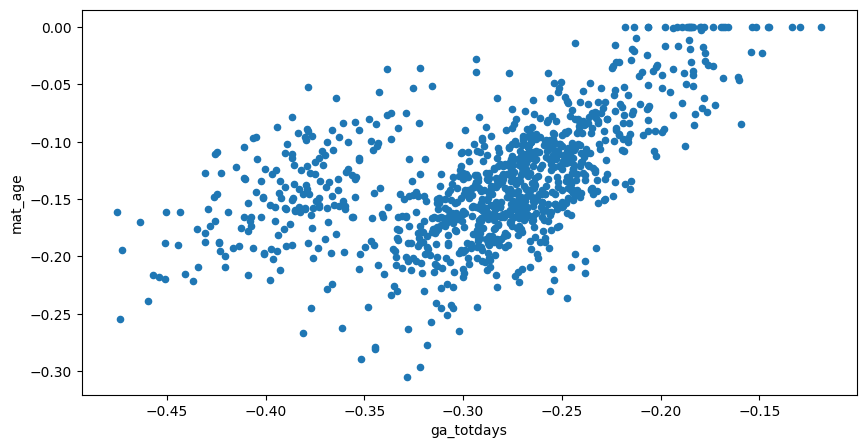

In [ ]:
coef_df.plot.scatter(x=0,y=1)

In [ ]:
coef_df.describe()

ga_totdays      mat_age      mat_bmi   mpop_white      is_twin
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.288608    -0.134522    -0.238682    -0.336548     0.317581
std       0.061273     0.053639     0.052149     0.069799     0.064057
min      -0.475273    -0.305157    -0.385548    -0.557403     0.012321
25%      -0.319592    -0.168062    -0.275030    -0.381171     0.284586
50%      -0.279579    -0.140471    -0.240565    -0.343076     0.322209
75%      -0.250055    -0.102844    -0.205305    -0.298686     0.355801
max      -0.118547    -0.000000    -0.000000    -0.000000     0.544112

In [ ]:
# ?sns.pairplot

<Figure size 1000x500 with 0 Axes>

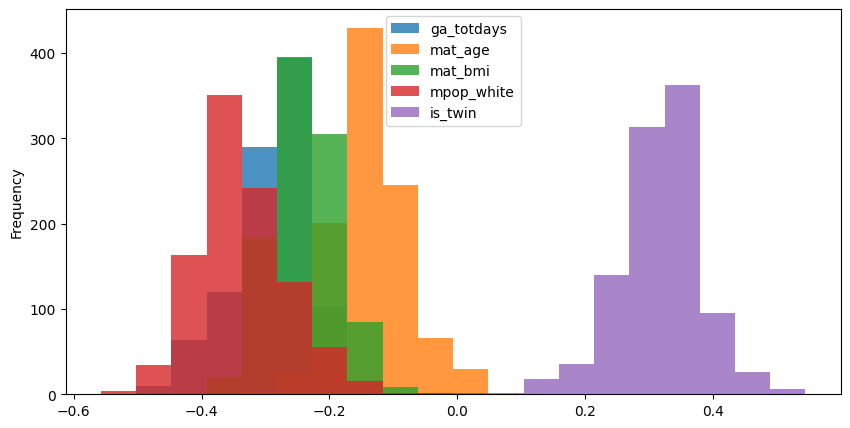

In [ ]:
plt.figure();
coef_df.plot.hist(alpha=0.8, bins=20); 
plt.show()

<seaborn.axisgrid.PairGrid>

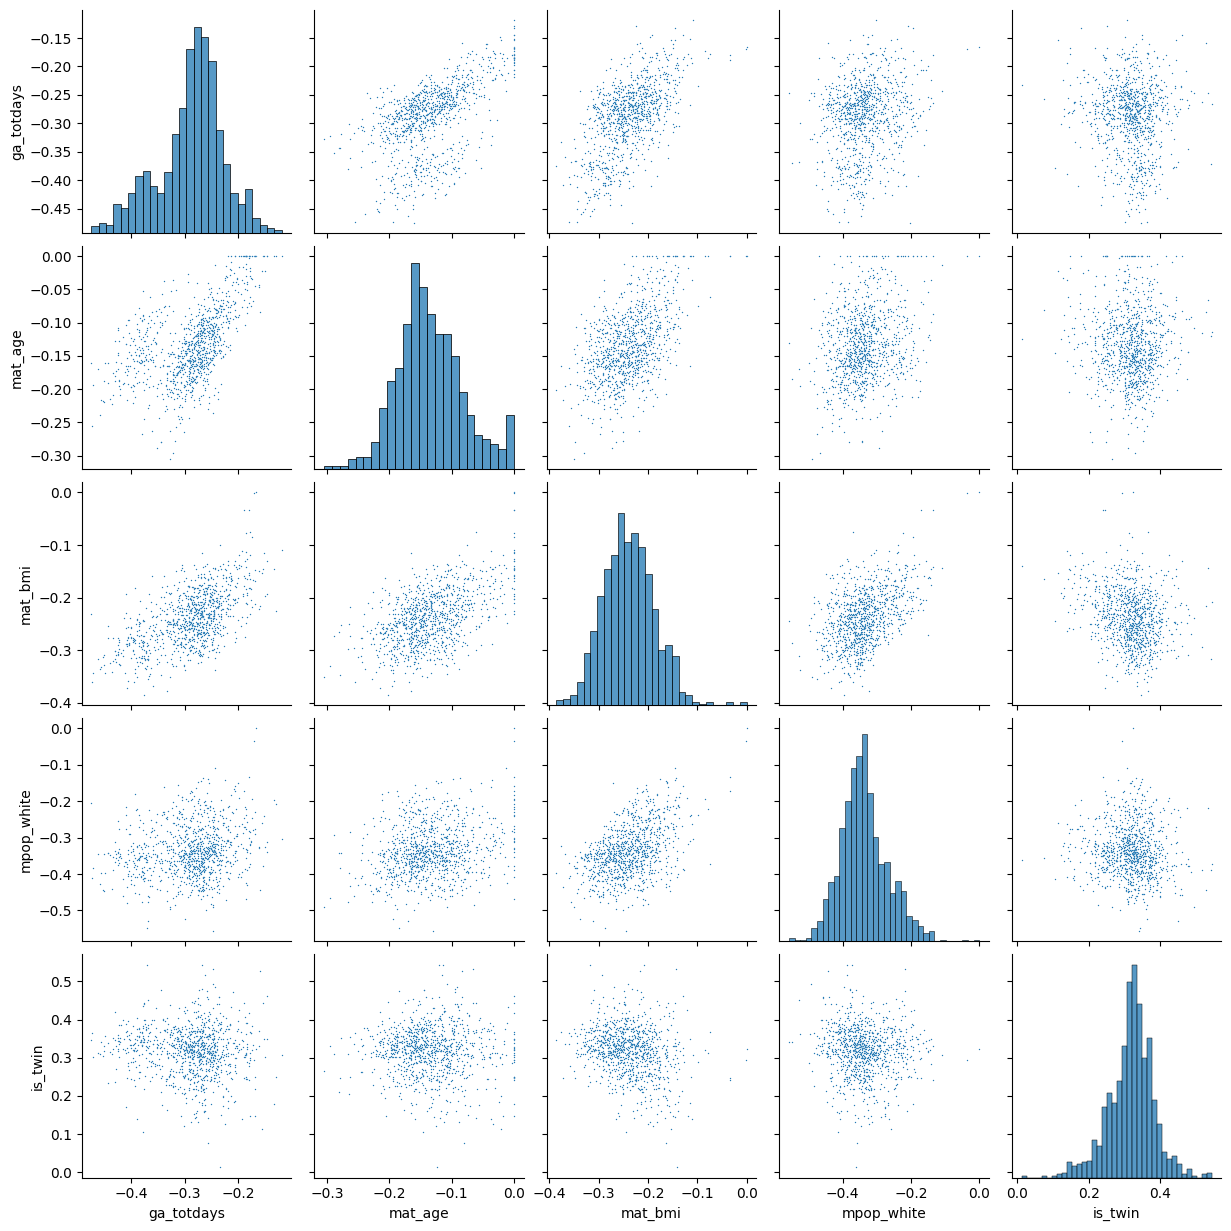

In [ ]:
# For scattermatrix plot stuff
sns.pairplot(coef_df, plot_kws={"s": 1.0})

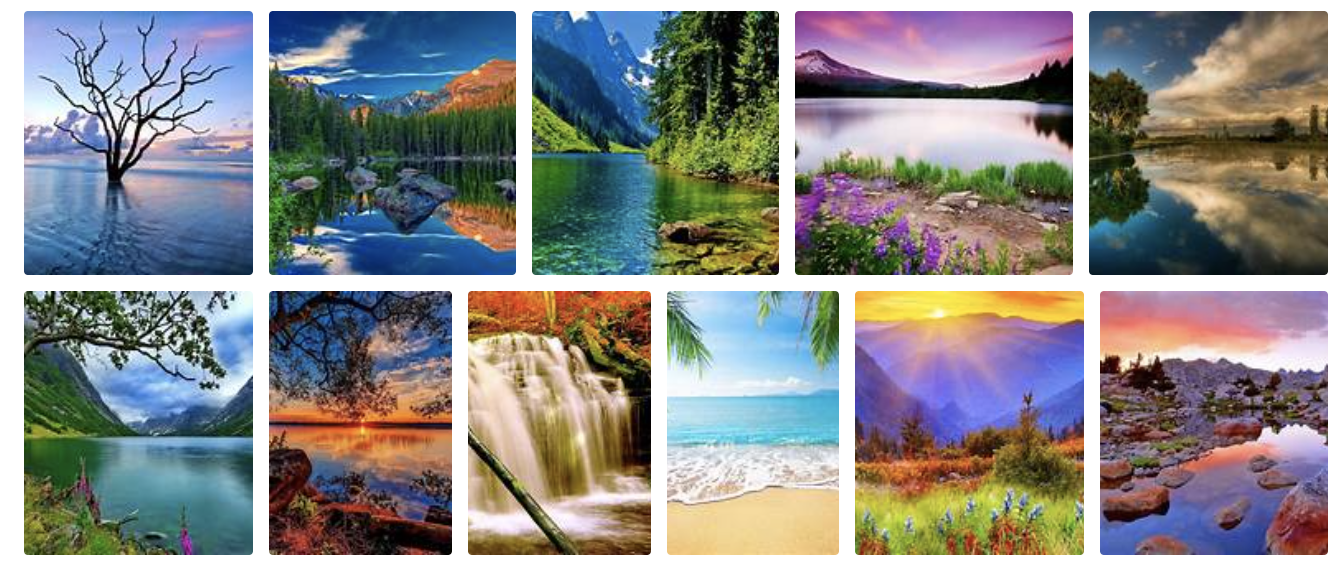

In [ ]:
coef_df

ga_totdays   mat_age   mat_bmi  mpop_white   is_twin
0     -0.392195 -0.148588 -0.314482   -0.387349  0.317503
1     -0.386727 -0.189583 -0.313807   -0.400882  0.378390
2     -0.290056 -0.160036 -0.225576   -0.349331  0.240991
3     -0.238261 -0.084640 -0.230761   -0.321250  0.225304
4     -0.252113 -0.056818 -0.176889   -0.270960  0.355325
..          ...       ...       ...         ...       ...
995   -0.356478 -0.129357 -0.299575   -0.343666  0.278307
996   -0.272725 -0.133474 -0.177013   -0.276120  0.290608
997   -0.245847 -0.077554 -0.235886   -0.437620  0.246134
998   -0.281898 -0.164914 -0.212031   -0.351553  0.304425
999   -0.274264 -0.115117 -0.199899   -0.205464  0.253323

[1000 rows x 5 columns]

In [ ]:
# coef_df.plot.scatter(x=0,y=1)

/tmp/ipykernel_1235/925458556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  coef_df.apply(lambda x: sns.distplot(x, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3, 'label' : x.name}));
/opt/conda/lib/python3.11/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_1235/925458556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

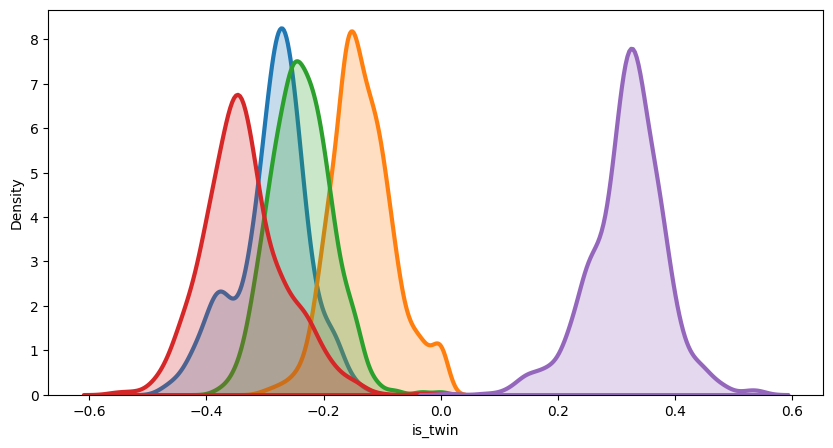

In [ ]:
# This is almost the way.
coef_df.apply(lambda x: sns.distplot(x, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3, 'label' : x.name}));

AttributeError: Line2D.set() got an unexpected keyword argument 'kde_kws'

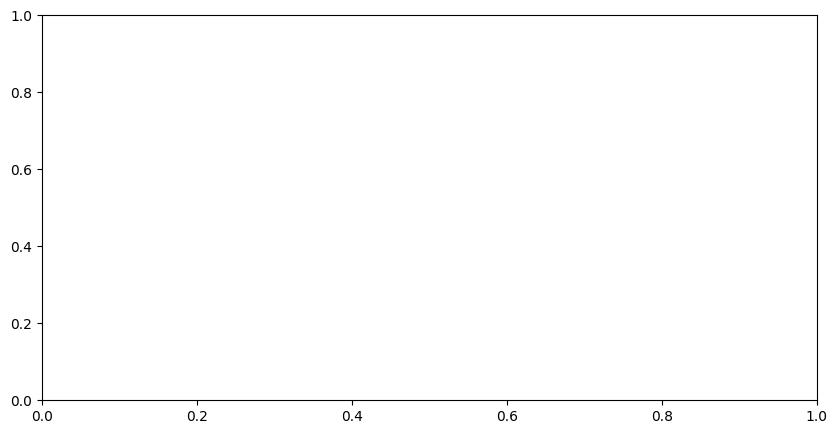

In [ ]:
# This is almost the way.
coef_df.apply(lambda x: sns.kdeplot(x, kde_kws = {'shade': True, 'linewidth': 3, 'label' : x.name}));

<matplotlib.legend.Legend>

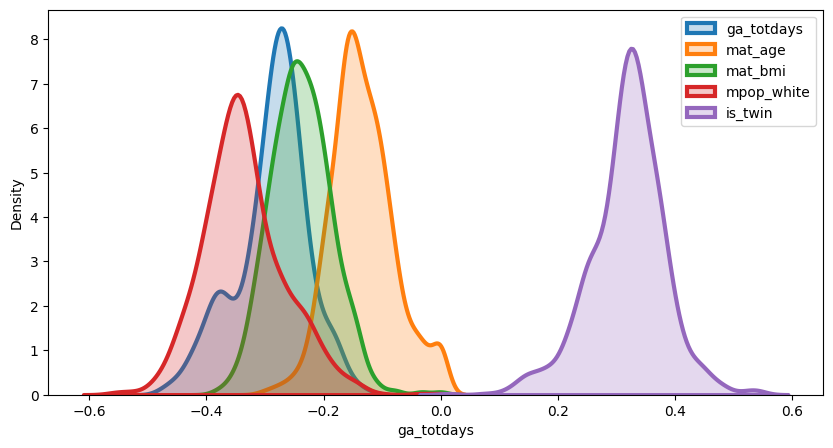

In [ ]:
coef_df.apply(lambda x: sns.kdeplot(x, **{'fill': True, 'linewidth': 3, 'label' : x.name})); plt.legend()

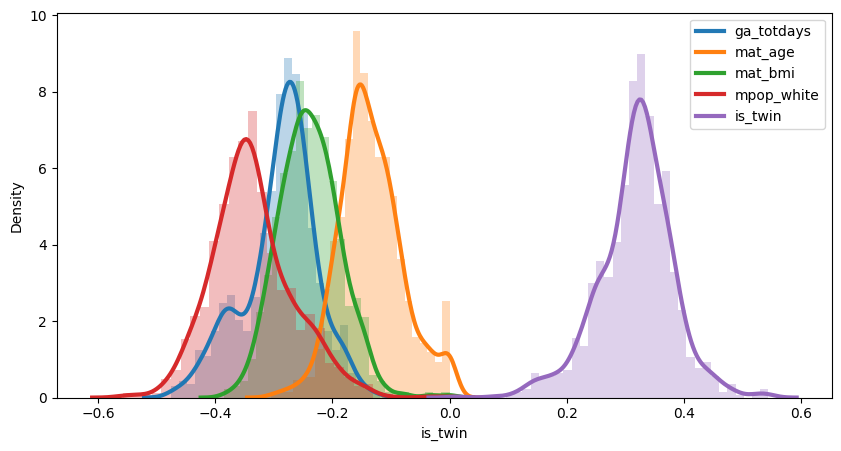

In [ ]:
# If you want this without warnings, you need to go and update it ("distplot" is getting removed).
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    coef_df.apply(lambda x: sns.distplot(x, hist = True, kde = True, hist_kws={"alpha":0.3, "linewidth": 3}, 
                                         kde_kws = {'shade': False, 'linewidth': 3, 'label' : x.name, 'alpha':0.99}));
    plt.legend()

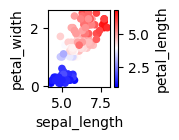

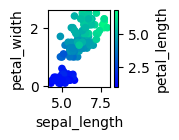

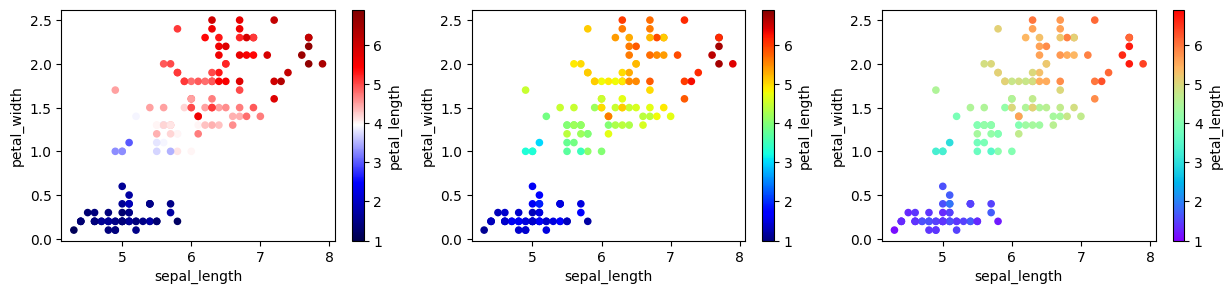

In [ ]:
# Load Iris data:
iris = sns.load_dataset("iris")

# Vanilla
iris.plot.scatter(x='sepal_length',y='petal_width',c='petal_length',cmap='bwr', figsize=(1,1),ax=plt.subplot(111)); plt.show()
iris.plot.scatter(x='sepal_length',y='petal_width',c='petal_length',cmap='winter', figsize=(1,1),ax=plt.subplot(111)); plt.show()

# plt.figure()
#iris.plot(subplots=True, layout=(1,4)) ## Does not work as desired

# This works! -> Excellent!!
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
iris.plot.scatter(x='sepal_length',y='petal_width',c='petal_length',cmap='seismic', ax=axes[0])
iris.plot.scatter(x='sepal_length',y='petal_width',c='petal_length',cmap='jet', ax=axes[1])
iris.plot.scatter(x='sepal_length',y='petal_width',c='petal_length',cmap='rainbow', ax=axes[2])
plt.show()



## Viz config stuff for pd+sns+plt
I used common package abbreviation in this sub-title.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# use this to display stuff:
pd.options.display.max_columns = 50
pd.options.display.precision

## Manhattan Plots

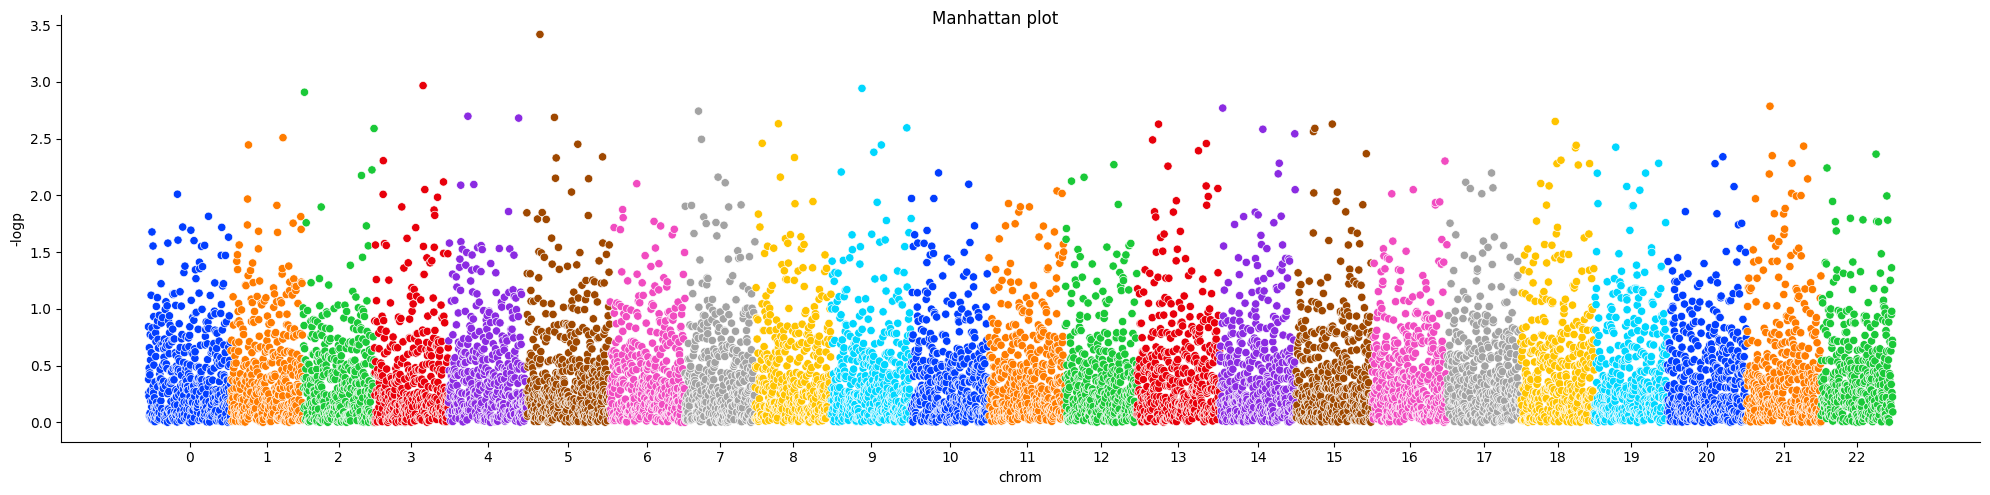

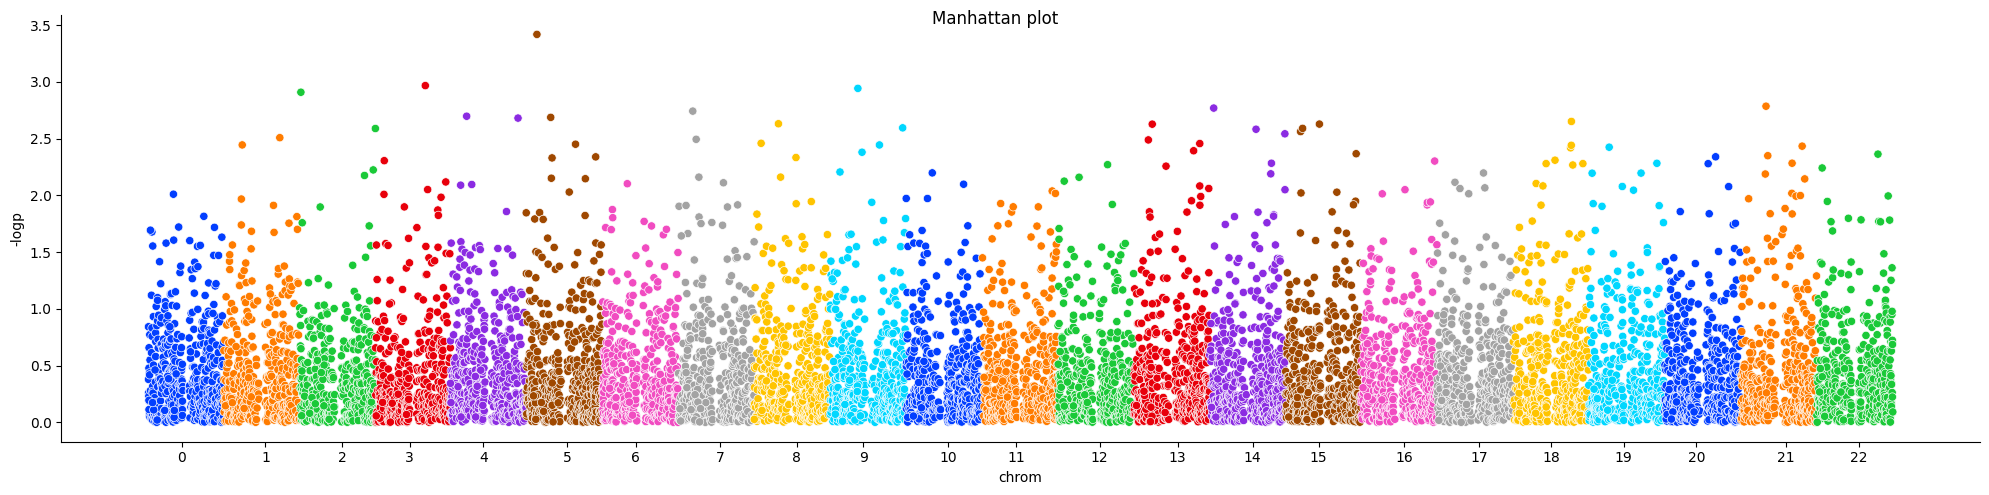

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
df = []
# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
def manhattan_plot(*, data_df, x, y, regcol='chrom'):
    plot = sns.relplot(data=data_df, x=x, y=y, aspect=4, hue=regcol, palette = 'bright', legend=None) 
    chrom_df=data_df.groupby(regcol)[x].median()
    plot.ax.set_xlabel(regcol); plot.ax.set_xticks(chrom_df); plot.ax.set_xticklabels(chrom_df.index)
    plot.fig.suptitle('Manhattan plot')
    plt.show()

# Simulate DataFrame (in "plink bim like" format).
gwas_df = pd.DataFrame({
'rsid'  : ['rs{}'.format(i) for i in np.arange(10000)],
'pval'  : uniform.rvs(size=10000),
'chrom' : [i for i in randint.rvs(0,23,size=10000)],
'pos'   : [i for i in randint.rvs(0,10**5,size=10000)]})
gwas_df['-logp'] = -np.log10(gwas_df.pval)
gwas_df = gwas_df.sort_values(['chrom','pos']); gwas_df.reset_index(inplace=True, drop=True); 
gwas_df['i'] = gwas_df.index

drift=4000
def fun(arg): # Function to create sampling gap in the middle of the chromosome.
    if (arg > (50000-drift)) and (arg < (50000 + drift)):
        arg = randint.rvs(0,10**5,size=1)[0]
    return arg
gwas_df['pos'] = gwas_df['pos'].apply(fun)
gwas_df['pos'] = gwas_df['pos'].apply(fun)
# arr = np.array([res_dt['neur.train']['C'].flatten(),res_dt['neur.train']['P'].flatten()]).T
# print('---')
# man_df = pd.DataFrame(arr, columns=['corr','pval'], index=bim_df.index.copy())
# man_df = bim_df.merge(man_df, left_index=True, right_index=True)
# man_df['-logp'] = -np.log10(man_df.pval)

# Create a good cumpos!
chrom_df = gwas_df.groupby('chrom')[['pos']].max().rename(columns=dict(pos='maxpos'))
chrom_df = chrom_df.cumsum() - chrom_df #df.iloc[0,0]
gwas_df = gwas_df.merge(chrom_df, left_on='chrom', right_on='chrom')
gwas_df['cumpos'] = gwas_df['pos'] + gwas_df['maxpos']
gwas_df['i']= gwas_df.index

# Plot those Manhattans!:
manhattan_plot(data_df=gwas_df, x='i',      y='-logp')
manhattan_plot(data_df=gwas_df, x='cumpos', y='-logp')


# Data Processing Trickery (Pandas&Numpy)

## Numpy


Should populate this later.

## Pandas

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ...:                           'foo', 'bar', 'foo', 'foo'],
   ...:                    'B' : ['one', 'one', 'two', 'three',
   ...:                           'two', 'two', 'one', 'three'],
   ...:                    'C' : np.random.randn(8),
   ...:                    'D' : np.random.randn(8)})

def fun(arg):
    return arg.copy()
df.groupby('A').apply(fun)
# Sometimes ONE HAS TO USE AGG() AND PD.SERIES TO GET IT TO WORK

A      B         C         D
A                                    
bar 1  bar    one  1.593198 -1.106698
    3  bar  three -0.136551 -1.285232
    5  bar    two -0.091798 -0.639158
foo 0  foo    one  1.312274  0.644841
    2  foo    two -0.224747  0.654681
    4  foo    two  0.123852  1.207584
    6  foo    one  1.142278 -1.296145
    7  foo  three  0.222377 -0.993053

In [ ]:
df.select_dtypes([np.number]).head()

C         D
0  1.312274  0.644841
1  1.593198 -1.106698
2 -0.224747  0.654681
3 -0.136551 -1.285232
4  0.123852  1.207584

In [ ]:

# Define the data
res_dt = {
    'mkey1': {
        'rkey1': [1, 2, 3],
        'rkey2': [4, 5, 6]
    },
    'mkey2': {
        'rkey3': [7, 8, 9],
        'rkey4': [10, 11, 12]
    }
}

# Define the 'fun' function
def fun(arg):
    return arg

# Apply the formula to create mod_df
perfnum = None
mod_df = pd.Series({(mkey, rkey, 'cv' + str(cvi)): fun(perfnum) 
                   for mkey, res1_dt in res_dt.items()
                   for rkey, res2_arr in res1_dt.items()
                   for cvi, perfnum in enumerate(res2_arr)})
mod_df = pd.DataFrame(mod_df, columns=['base'])
mod_df.index.set_names(['model', 'repit', 'fold'], inplace=True)

display(mod_df, mod_df['base'].groupby(['model']).agg([np.mean,np.std]).sort_values('mean'))
display(mod_df['base'].groupby(['model']).agg([np.mean,np.std]).sort_values('mean')) #.head())
display(mod_df['base'].unstack('model').apply([np.mean,np.std]))

base
model repit fold      
mkey1 rkey1 cv0      1
            cv1      2
            cv2      3
      rkey2 cv0      4
            cv1      5
            cv2      6
mkey2 rkey3 cv0      7
            cv1      8
            cv2      9
      rkey4 cv0     10
            cv1     11
            cv2     12

mean       std
model                
mkey1   3.5  1.870829
mkey2   9.5  1.870829

mean       std
model                
mkey1   3.5  1.870829
mkey2   9.5  1.870829

model     mkey1     mkey2
mean   3.500000  9.500000
std    1.870829  1.870829

In [ ]:
.xs('something', level='lvl')

In [ ]:
.filter(like='something', axis=1)

In [ ]:
# apply, transform, agg, filter

In [ ]:
df.rename(index={"one": "two", "y": "z"})
In [107]: s.index.set_names(['L1', 'L2'], inplace=True)

In [ ]:
.unstack('model')
tst_df.reorder_levels([2,1,0]).sort_index()

In [ ]:
mod_df['base'].groupby(['model']).agg([np.mean,np.std]).sort_values('mean').head()
mod_df['base'].unstack('model').apply([np.mean,np.std])

In [ ]:
pd.read

In [ ]:
# Nested performace estimation code:

## This works, but it contains waaay 2 much thinkering.
#nlst = ['hghgfg']
def w(fun): return fun #lambda x: fun(x)
def fun0(df): return pd.Series(df.apply(np.concatenate).values.mean(),index=['mean'])
def fun1(df):
    #nlst[0] = df.copy()
    v = df.apply(np.concatenate).values.std()
    return pd.Series(v,index=['std'])

fun_lst = [w(eval('fun'+str(i))) for i in range(2)]

def meta(df):
    r_lst = []
    for fun in fun_lst:
        r_lst.append(fun(df))
    return pd.concat(r_lst)

perf_df.groupby('model').apply(meta).sort_values('mean').iloc[::-1].head(10)

In [ ]:
def fun(arg):
    return arg.copy()
this_df.set_index('n_pca').groupby('shift').apply(fun).unstack('shift')['r2'].plot()

NameError: name 'this_df' is not defined

In [ ]:
df = pd.DataFrame({ "manager": ["Johns;Tim ", "Mcgregor; Dave", "DeRocca; Leo", "Haze; Jim"] ,
                     "target": [42000, 85000, 45000, 33000]}); display(df)
df[['last_name','first_name']] =  df['manager'].str.split(";", n=1, expand=True) # n is max number of splits
df

manager  target
0      Johns;Tim    42000
1  Mcgregor; Dave   85000
2    DeRocca; Leo   45000
3       Haze; Jim   33000

manager  target last_name first_name
0      Johns;Tim    42000     Johns       Tim 
1  Mcgregor; Dave   85000  Mcgregor       Dave
2    DeRocca; Leo   45000   DeRocca        Leo
3       Haze; Jim   33000      Haze        Jim

In [ ]:
# Explode dict colunms:
df = pd.DataFrame({"A":[{"a":3},{"b":4,"c":5}], "B":[6,7]})
display(df)
df['A'].apply(pd.Series); display(_)
df = pd.concat([df, df["A"].apply(pd.Series)], axis=1); display(df)

print('-- Another way to explode dicts: --')
df = pd.DataFrame({"A":[{"a":3},{"b":4,"c":5}], "B":[6,7]})
pd.DataFrame(df['A'].to_list()) 

print('-- 2 more ways --')
df.join(pd.json_normalize(df.A)); display(_)
df.join(df.A.apply(pd.Series)); display(_)

A  B
0          {'a': 3}  6
1  {'b': 4, 'c': 5}  7

manager  target last_name first_name
0      Johns;Tim    42000     Johns       Tim 
1  Mcgregor; Dave   85000  Mcgregor       Dave
2    DeRocca; Leo   45000   DeRocca        Leo
3       Haze; Jim   33000      Haze        Jim

A  B    a    b    c
0          {'a': 3}  6  3.0  NaN  NaN
1  {'b': 4, 'c': 5}  7  NaN  4.0  5.0

-- Another way to explode dicts: --
-- 2 more ways --


manager  target last_name first_name
0      Johns;Tim    42000     Johns       Tim 
1  Mcgregor; Dave   85000  Mcgregor       Dave
2    DeRocca; Leo   45000   DeRocca        Leo
3       Haze; Jim   33000      Haze        Jim

manager  target last_name first_name
0      Johns;Tim    42000     Johns       Tim 
1  Mcgregor; Dave   85000  Mcgregor       Dave
2    DeRocca; Leo   45000   DeRocca        Leo
3       Haze; Jim   33000      Haze        Jim

In [ ]:
# pd.DataFrame(df['A'].to_list()) 

# ML Recipes

## Pytorch 101

In [ ]:
#  -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 505.64410400390625
199 337.98028564453125
299 226.92686462402344
399 153.361083984375
499 104.6224136352539
599 72.3280029296875
699 50.92662048339844
799 36.74208450317383
899 27.339014053344727
999 21.10478401184082
1099 16.970691680908203
1199 14.228747367858887
1299 12.409767150878906
1399 11.202799797058105
1499 10.401751518249512
1599 9.87000560760498
1699 9.516922950744629
1799 9.282390594482422
1899 9.126569747924805
1999 9.023015975952148
Result: y = 0.004640887025743723 + 0.8434610962867737 x + -0.0008006299030967057 x^2 + -0.09144145995378494 x^3


## Keras Snippet

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.wrappers.scikit_learn import KerasRegressor


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, HuberRegressor, LassoCV, LarsCV, Lars
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import auc, make_scorer, roc_auc_score, r2_score
from sklearn.model_selection import KFold, train_test_split
from scipy.stats import pearsonr, spearmanr
# from keras import Sequential
# from keras.layers import Dense, Dropout
res_dt = dict()
def pearson_score(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]

def spearman_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]
    
def create_model(optimizer='sgd',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.5):
    model = Sequential()

    model.add(Dense(10,activation='tanh',kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout))
    model.add(Dense(10,activation='tanh',kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout))
#     model.add(Dropout(dropout))
#     model.add(Dense(128,activation='tanh',kernel_initializer=kernel_initializer))
#     model.add(Dropout(dropout))
    model.add(Dense(1,activation='linear',kernel_initializer=kernel_initializer))

    model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['accuracy'])

    return model

# wrap the model using the function you created
dnn = KerasRegressor(build_fn=create_model, verbose=0)

# just create the pipeline
# pipeline = Pipeline([
#     ('clf',clf)
# ])

# pipeline.fit(X_train, y_train)


## Gaussian Processes

In [ ]:
##################################################
## Basic setup
from sklearn.datasets import load_wine
wine_dt = load_wine()
wine_df = pd.DataFrame(wine_dt['data'],columns=wine_dt['feature_names'])

X = wine_df.values
n,p = X.shape
Sigma = X.T.dot(X)/n; print('Sigma.shape -> ', Sigma.shape)


###################################################
## Generate Basic sample from Multivariate Normal:
x = np.random.multivariate_normal(np.zeros(p),Sigma)
print(x)




Sigma.shape ->  (13, 13)
[3.89132606e+01 8.12103938e+00 6.87224463e+00 5.69947022e+01
 3.05815577e+02 7.50441890e+00 6.04952658e+00 7.70976236e-01
 4.46277373e+00 1.11720361e+01 2.68117246e+00 8.21249076e+00
 1.90230019e+03]


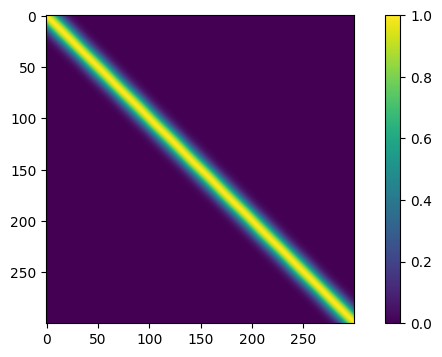

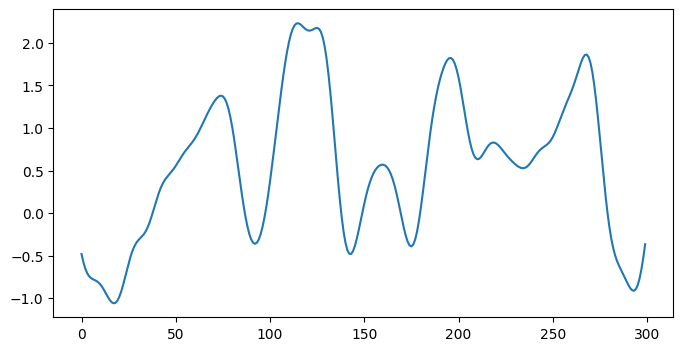

In [ ]:
## Generate from Kernels: RBF
####################################################

p = 300
X = np.linspace(0.0,1.0,p)[:,np.newaxis]
line_df = pd.DataFrame(X)

l = 0.03
s = 1.0
def fun(a,b):
    return (s**2.0)*np.exp(-((a-b)**2)/(2*l**2))

S = line_df.T.corr(method=fun)
plt.figure(figsize=[8,4]); plt.imshow(S); plt.colorbar(); plt.show()

x_smp = np.random.multivariate_normal(np.zeros(p),S) # Native cholesky from np.linalg has issues, this uses svd
plt.figure(figsize=[8,4]); plt.plot(x_smp); plt.show()


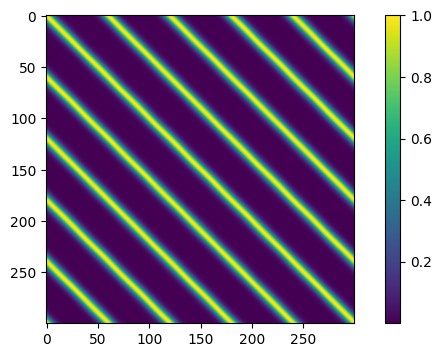

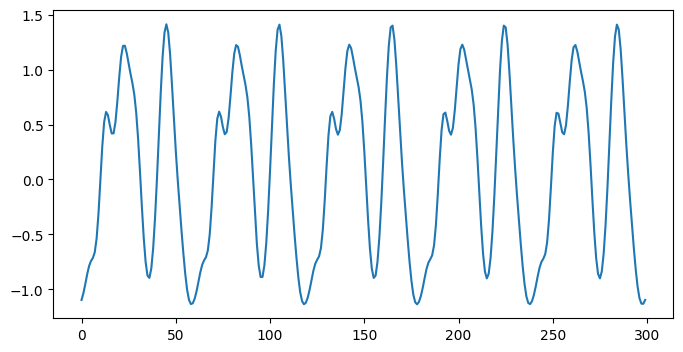

In [ ]:
## Generate from Kernels: RBF
####################################################

p = 300
X = np.linspace(0.0,1.0,p)[:,np.newaxis]
line_df = pd.DataFrame(X)

per = .2
l = 0.35
s= 1.0
def fun(a,b):
    return (s**2.0)*np.exp((-2*np.sin(np.pi*np.abs(a-b)/per)**2)/(2*l**2))

S = line_df.T.corr(method=fun)
plt.figure(figsize=[8,4]); plt.imshow(S); plt.colorbar(); plt.show()

x_smp = np.random.multivariate_normal(np.zeros(p),S) # Native cholesky from np.linalg has issues, this uses svd
plt.figure(figsize=[8,4]); plt.plot(x_smp); plt.show()


## Recipe Resources

- Awesome Brit @ pydata Amsterdam, debugging ML models: https://www.youtube.com/watch?v=DkLPYccEJ8Y
- maybe mildly interesting: https://www.youtube.com/watch?v=kbj3llSbaVA similar topic

# Threading, Multiprocessing & Sys-Ops

## RAM usage:

In [ ]:
import os, psutil
process = psutil.Process(os.getpid())
print(process.memory_info().rss/1024**3)  # in bytes 

0.23577880859375


In [ ]:
# ramgb?

## Vanilla (?) 

In [ ]:
# Still nothing like parfor...

In [ ]:
i = -1
import sys,copy
from functools import partial
def fun(arg_dt, something='ergerg'):
    sys._getframe(1).f_locals.update(**arg_dt)
    #locals().update(**arg_dt) # <-- will not work
    q=i+1
    return q
# inspect.currentframe().f_locals['foo'] = 'bar'
lst = []  ; lst2 = []; lst3 = []
for i in range(5):
    ndt = dict()
    ndt.update(**locals())
    ndt['i'] = copy.copy(ndt['i'])*1.0
    lst2.append(ndt)
    lst3.append(fun)
    lst.append(partial(lst3[-1], lst2[-1])) # Partial stuff does not work with locals trickery
print(list(map(lambda x: x(), lst)))
print(list(map(fun,lst2)))

[5, 5, 5, 5, 5]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [ ]:

from threading import Thread
tdt = {}
arg = 3
def fun():
    time.sleep(1)
    res = arg + 5
    tdt['res'] = res
    return res

tobj = Thread(target=fun)
tt = tobj.start()

In [ ]:
r = tobj.join()

In [ ]:
tobj.

<Thread(Thread-6 (fun), stopped 139627026589248)>

In [ ]:
# tt

In [ ]:
fun()

8

In [ ]:
# ergerg
# from multiprocessing import Pool 
from multiprocessing.pool import ThreadPool, Pool
import time

try:
    pool.close()
except:
    True
# pool = Pool(10)
pool = ThreadPool(10)
print('this')

nanidx_dt = {}

def foo_pool(i, iid, slice_arr):
    nanidx_sampi_arr = np.nonzero(int8_trn_sda.val[i,:].copy() == -127)[0]
#     nanidx_sampi_arr = np.nonzero(slice_arr == -127)[0]
    return i, '_'.join(iid), nanidx_sampi_arr

def log_result(res):
    i , iid_key, slice_arr = res
    # This is called whenever foo_pool(i) returns a result.
    # result_list is modified only by the main process, not the pool workers.
#     print('inside :',i)
    nanidx_dt[iid_key] = slice_arr
#     nanidx_lst.append(slice_arr)

for i, iid in enumerate(int8_trn_sda.iid):
    rr = pool.apply_async(foo_pool, args = (i, iid, 0), callback=log_result)
    if np.mod(i, 2000) == 0:
        print('this: ', i, end='\r')
        time.sleep(0.02)
        
print(f't-step:{len(tc_lst)}', time.time()-tc_lst[-1]); tc_lst.append(time.time());
while len(nanidx_dt.keys()) < (200000-5):
    time.sleep(5)
    print('bing', end=', ')
    
print(f't-step:{len(tc_lst)}', time.time()-tc_lst[-1]); tc_lst.append(time.time());
pool.close()
pool.join()

this


NameError: name 'int8_trn_sda' is not defined

In [ ]:
from concurrent.futures import ThreadPoolExecutor #, ProcessPoolExecutor
pool = ThreadPoolExecutor(4)

tdt = {}
def fun(arg):
    time.sleep(1)
    res = arg*1.9 + 5
    tdt[arg] = res
    return res + 3

fut = pool.submit(fun, arg)
print(fut.result(), '(Takes a second)')

9.9 (Takes a second)


In [ ]:
fut_lst = []
arg_lst = [1,2,3,4,5,6,7,8,9]


tdt = {}
def fun(arg):
    time.sleep(10)
    res = arg*1.9 + 5
    tdt[arg] = res
    return res + 3

for arg in arg_lst:
    fut = pool.submit(fun, arg)
    fut_lst.append(fut)
    

In [ ]:
print(pool._work_queue.qsize())
res_lst = [fut.result() for fut in fut_lst]
print(res_lst, '(Takes seconds)')

5
[9.9, 11.8, 13.7, 15.6, 17.5, 19.4, 21.299999999999997, 23.2, 25.099999999999998] (Takes seconds)


In [ ]:
# the option for which there is no code here:
concurrent.futures

## Submitit pipeline

### Basic setup

In [ ]:
# Function to execute on cluster:
def run_blrjob(model=None):
    tic(); print(model)
    model.fit(X,y)
    toc()
    return model


# Executor:
log_folder = "/home/mennow/dsmwpred/mennow/log_test/%j"
executor = submitit.AutoExecutor(folder=log_folder)
executor.update_parameters(slurm_mem='100G', cpus_per_task=15, slurm_time='10:04:00',slurm_additional_parameters={'account': 'risk_prediction'}) 
#slurm_account='risk_prediction')

# Jobs specs:
job_dt = {}
for key, model in model_dt.items():
    job_dt[key] = executor.submit(run_blrjob, model=model)

# Check:
print('and after:') 
!que

In [ ]:
!que # Should I add this to my mjwt package?

/bin/bash: line 1: que: command not found


### Parameter Grid

In [ ]:
# Approach version I:

from sklearn.model_selection import ParameterGrid
# [chaindt(minidt for minidt in dt.values()) for dt in params_lst]
def nans2nones(in_df):
    isna = in_df.isna().values
    vals = in_df.values; vals[isna] = None
    return pd.DataFrame(vals, index=in_df.index, columns=in_df.columns)


ld_lst = [
    dict(cm=0.01, shift=0), #0
    dict(cm=2.0,  shift=0), #3
    dict(cm=10.0, shift=0), #6
]

fold_lst = [
    dict(fold='val', geno_fn='UKBB.val'),
    dict(fold='test', geno_fn='UKBB.test')
]

dtype_lst = [
    dict(dtype='float32'),
    dict(dtype='float64')
]

dt = dict(
    ld    = ld_lst,
    fold  = fold_lst,
    dtype = dtype_lst
)

params_lst = list(ParameterGrid(dt))
df = pd.DataFrame(params_lst)
param_df = pd.concat([df[cols].apply(lambda x: pd.Series(x, dtype='object')) for cols in df.columns], axis=1)
param_df = nans2nones(param_df)
# param_df.T.to_dict()
param_df.head()


dtype  fold    geno_fn    cm shift
0  float32   val   UKBB.val  0.01     0
1  float32   val   UKBB.val   2.0     0
2  float32   val   UKBB.val  10.0     0
3  float32  test  UKBB.test  0.01     0
4  float32  test  UKBB.test   2.0     0

In [ ]:
# Approach version II:

# Grid Hyperparams:
n_reps = 1
n_iter_arr = np.array([10])
h2_arr     = np.round(np.logspace(log(0.05),log(0.9),8),3)
random_state = 42
if not 'L2Pred' in locals(): # Trick
    class L2Pred: pass

# Create param_df:
param_df = pd.DataFrame([0],columns=['null'])

# Assign fun:
def assign_fun(arg_df, **kwargs):
    arg_df = arg_df.copy()
    for key,item in kwargs.items():
        arg_df[key] = [item] * arg_df.shape[0]
    return arg_df

# Data specs:
dataspec_lst = []
for i in range(n_reps):
    dataspec_lst = dataspec_lst + [
        (dict(random_state=random_state+i, pheno=pheno)) for pheno in ['PRCA','TURBO']
    ]
param_df = pd.concat([assign_fun(param_df, dwargs=dkwargs)
                     for dkwargs in dataspec_lst]
                    ).reset_index(drop=True)
# Model specs:
modelspec_lst = [
    *((L2Pred, dict(something='this', h2=h2, n_iter=n_iter)) for h2 in h2_arr for n_iter in n_iter_arr),
    *((L2Pred, dict(something='that', h2=h2, n_iter=n_iter)) for h2 in h2_arr for n_iter in n_iter_arr)
]
param_df = pd.concat([assign_fun(param_df, mclass=mclass, mkwargs=mkwargs)
                     for mclass, mkwargs in modelspec_lst]
                    ).reset_index(drop=True)

display(param_df.head())

null                                  dwargs                     mclass  \
0     0   {'random_state': 42, 'pheno': 'PRCA'}  <class '__main__.L2Pred'>   
1     0  {'random_state': 42, 'pheno': 'TURBO'}  <class '__main__.L2Pred'>   
2     0   {'random_state': 42, 'pheno': 'PRCA'}  <class '__main__.L2Pred'>   
3     0  {'random_state': 42, 'pheno': 'TURBO'}  <class '__main__.L2Pred'>   
4     0   {'random_state': 42, 'pheno': 'PRCA'}  <class '__main__.L2Pred'>   

                                            mkwargs  
0   {'something': 'this', 'h2': 0.05, 'n_iter': 10}  
1   {'something': 'this', 'h2': 0.05, 'n_iter': 10}  
2  {'something': 'this', 'h2': 0.076, 'n_iter': 10}  
3  {'something': 'this', 'h2': 0.076, 'n_iter': 10}  
4  {'something': 'this', 'h2': 0.114, 'n_iter': 10}

In [ ]:
# Approach version III:
# Grid Hyperparams:
n_reps = 1
n_iter_arr = np.array([10])
h2_arr     = np.round(np.logspace(log(0.05),log(0.9),8),3)
random_state = 42
if not 'L2Pred' in locals(): # Trick
    class L2Pred: pass
    
# Data specs:
dataspec_lst = []
for i in range(n_reps):
    dataspec_lst = dataspec_lst + [
        (dict(random_state=random_state+i, pheno=pheno)) for pheno in ['PRCA','TURBO']
    ]

# Model specs:
modelspec_lst = [
    *((L2Pred, dict(something='this', h2=h2, n_iter=n_iter)) for h2 in h2_arr for n_iter in n_iter_arr),
    *((L2Pred, dict(something='that', h2=h2, n_iter=n_iter)) for h2 in h2_arr for n_iter in n_iter_arr)
]

dt = dict(
dwargs = dataspec_lst,
mkwargs = modelspec_lst,
)
grid = pd.DataFrame(ParameterGrid(dt))
grid.head()

dwargs  \
0  {'random_state': 42, 'pheno': 'PRCA'}   
1  {'random_state': 42, 'pheno': 'PRCA'}   
2  {'random_state': 42, 'pheno': 'PRCA'}   
3  {'random_state': 42, 'pheno': 'PRCA'}   
4  {'random_state': 42, 'pheno': 'PRCA'}   

                                                                         mkwargs  
0   (<class '__main__.L2Pred'>, {'something': 'this', 'h2': 0.05, 'n_iter': 10})  
1  (<class '__main__.L2Pred'>, {'something': 'this', 'h2': 0.076, 'n_iter': 10})  
2  (<class '__main__.L2Pred'>, {'something': 'this', 'h2': 0.114, 'n_iter': 10})  
3  (<class '__main__.L2Pred'>, {'something': 'this', 'h2': 0.173, 'n_iter': 10})  
4  (<class '__main__.L2Pred'>, {'something': 'this', 'h2': 0.261, 'n_iter': 10})

### Job processing

In [ ]:
# # Define Internal Executor:
debug = False; print('debug =', debug)
folder = "../lnk/menno/log_test/%j"
executor = submitit.AutoExecutor(folder=folder)
executor.update_parameters(slurm_mem='119G', cpus_per_task=15, slurm_time='11:54:00',
                           slurm_additional_parameters={'account': 'NCRR'})

if debug:
    make_brd_df = lambda : brd 
else:
    def make_brd_df(fn='../results/betas/final/all-betas.pst.h5'):
        brd = PstHdf5(fn)
        return brd
def debug_make_pheno_df(fold='test'):
    return pheno_df
wrapped_make_pheno_df = debug_make_pheno_df if debug else make_pheno_df

job_dt = dict()
for i, cfg_dt in param_df.T.to_dict().items(): 

    def ppb_fun():
        xp_dt = experimental_setup(geno_fn=cfg_dt['geno_fn'], fold=cfg_dt['fold'], shift=cfg_dt['shift'], gb_size_limit=19., cm=cfg_dt['cm'], dtype=cfg_dt['dtype']) 
        pheno_df = wrapped_make_pheno_df(fold=cfg_dt['fold'])
        brd = make_brd_df()

        tst_prd = Pheno(dict(iid=pheno_df.index.to_frame()[['fid','iid']].values.astype(str),
                   vals=pheno_df.values, header=list(pheno_df.columns)))
        cur_srd, cur_prd = pstutil.intersect_apply([xp_dt['tst_srd'], tst_prd])

        pgm = MultiPGSModel(brd=brd, verbose=True, dtype=cfg_dt['dtype'])
        pred_dt = pgm.predict(srd=cur_srd, prd=cur_prd)

        linkdata = xp_dt['tst_linkdata']
        mc = PrivacyPreservingMetricsComputer(linkdata=linkdata, brd=brd, s=pred_dt['s'], Bm=pred_dt['Bm'], cov_method='local', dtype=cfg_dt['dtype'], clear_linkage=False)
        mcres_dt = mc.evaluate(debug=debug)
        
        C = corr(pred_dt['Ytru'].astype(cfg_dt['dtype']), pred_dt['Yhat'].astype(cfg_dt['dtype']))
        
        res_dt = dict(brd=pred_dt['brd'], C=C,
                      Bm=pred_dt['Bm'], stansda=pred_dt['stansda'], 
                      mcres_dt=mcres_dt, linkdata=linkdata)
        
        return res_dt
                           
    job_dt[i] = executor.submit(ppb_fun)
    print('submitted: ', i, end='\r')
print('done')
eval_job_dt = job_dt

## Profling

In [ ]:
import line_profiler
%load_ext line_profiler
%lprun -f model.fit model.fit(X,y)
# other example:
# %lprun -f experimental_setup experimental_setup(decomp_fun=vanilla_svd, filter_str='minitest')
# Also if there is no code showm, perhaps try to update package line_profiler

ModuleNotFoundError: No module named 'line_profiler'

In [ ]:
# or

In [ ]:
%prun model.fit(X,y)
%memeit model.fit(X,y) # for RAM profiling

In [ ]:
def fun():
    n= 100
    X = np.random.randn(n,n)
    D = X.T@X/n
    for i in range(50):
        a,b,c = linalg.svd(D)
        invt_chol = linalg.cholesky(D + np.eye(n)*0.01)
        
prof = %lprun -r -f fun res=fun()
prof.print_stats()

Timer unit: 1e-09 s

Total time: 0.14446 s
File: /tmp/ipykernel_1752/2008979480.py
Function: fun at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def fun():
     2         1       1112.0   1112.0      0.0      n= 100
     3         1     357956.0 357956.0      0.2      X = np.random.randn(n,n)
     4         1     463782.0 463782.0      0.3      D = X.T@X/n
     5        50      45637.0    912.7      0.0      for i in range(50):
     6        50  125506374.0 2510127.5     86.9          a,b,c = linalg.svd(D)
     7        50   18085045.0 361700.9     12.5          invt_chol = linalg.cholesky(D + np.eye(n)*0.01)



In [ ]:
for j in tqdm(range(6)):
    time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

## Timing Experiments:

In [ ]:

pystr = """
import os
os.environ['OPENBLAS_NUM_THREADS'] = '{n_cpu}'
# os.environ
def return_fun(this_np):
    n_trix = {n_trix}
    X = this_np.random.randn(n_trix,n_trix)
    def fun():
        for i in range(80):
            s = X.dot(X)
    return fun

import numpy as np
fun = return_fun(np)
fun()
"""
# import os
# # os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4
# os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4 
# # os.environ["MKL_NUM_THREADS"] = "4" # export MKL_NUM_THREADS=6
# # os.environ["VECLIB_MAXIMUM_THREADS"] = "4" # export VECLIB_MAXIMUM_THREADS=4
# # os.environ["NUMEXPR_NUM_THREADS"] = "4" # export NUMEXPR_NUM_THREADS=6


def fun(n_cpu, n_trix):
    import subprocess
    proc = subprocess.run("python -c \"" + pystr.format(n_cpu=n_cpu, n_trix=n_trix) + "\"", shell=True, check=False, capture_output=True)
#     print(proc.stdout.decode('utf-8'))
#     print(proc.stderr.decode('utf-8'))
    
n_trix = 1000
for i in [10,5,2,1]:
    print(i)
    %timeit fun(i, n_trix)


10
2.74 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5
2.77 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2
2.74 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1
4.87 s ± 49.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Schedulers
    


## Slurm & Submitit Tricks

'job_dt' contains dictionary with SlurmJob() objects from the package submitit. How to make these I might specify later.

In [ ]:
for i, job in job_dt.items():
    job.cancel()
    

In [ ]:
# Cancel ALL submitit jobs!:
from io import StringIO
string =  !que
stringio = StringIO('\n'.join(string))
que_df = pd.read_table(stringio, delim_whitespace=True); que_df

for _, jobid in que_df.JOBID[que_df.NAME == 'submitit'].iteritems():
    stop # raise error to prevent effects of sloppy copy pasting.
    !scancel {jobid}

Use printouts from job_dt to reinstate the job_dt and continue analysis:

In [ ]:
string = """60080867, 60080868, 60080869, 60080870, 60080871, 60080872, """
log_folder = "/home/mennow/dsmwpred/mennow/log_test/%j"
eval_job_dt = dict()
for i, job_id in enumerate(string.split(', ')):
    if job_id != '': eval_job_dt[i] = submitit.SlurmJob(job_id=job_id, folder=log_folder) 

In [ ]:
string='''{0: SlurmJob<job_id=55037710, task_id=0, state="COMPLETED">,
 1: SlurmJob<job_id=55037711, task_id=0, state="COMPLETED">,
 2: SlurmJob<job_id=55037712, task_id=0, state="RUNNING">,
 3: SlurmJob<job_id=55037713, task_id=0, state="RUNNING">,
 4: SlurmJob<job_id=55037714, task_id=0, state="COMPLETED">,
 5: SlurmJob<job_id=55037715, task_id=0, state="COMPLETED">,
 6: SlurmJob<job_id=55037716, task_id=0, state="RUNNING">,
 7: SlurmJob<job_id=55037717, task_id=0, state="RUNNING">,
 8: SlurmJob<job_id=55037718, task_id=0, state="COMPLETED">,
 9: SlurmJob<job_id=55037719, task_id=0, state="COMPLETED">,
 10: SlurmJob<job_id=55037720, task_id=0, state="COMPLETED">,
 11: SlurmJob<job_id=55037721, task_id=0, state="RUNNING">,
 12: SlurmJob<job_id=55037722, task_id=0, state="RUNNING">,
 13: SlurmJob<job_id=55037723, task_id=0, state="RUNNING">,
 14: SlurmJob<job_id=55037724, task_id=0, state="RUNNING">,
 15: SlurmJob<job_id=55037725, task_id=0, state="RUNNING">}'''

folder = "/home/mennow/dsmwpred/mennow/log_test/%j"
job_dt = dict()
for i, elem in enumerate(string.split('\n')):
    start = 'job_id='
    stop = ', task_id='
    job_id = elem[elem.find(start)+len(start):elem.find(stop)]
    job_dt[i] = submitit.SlurmJob(job_id=job_id, folder=folder)

In [ ]:
# Clean out everything older then 9 days modded. Careful with this!
!find ./log_test/* -type d -ctime +9 -exec rm -rf {} \;

In [ ]:
string = !squeue -t pd
# string = !squeue -t r # For RUNNING ones.
string = '\n'.join(string)
from io import StringIO
df = pd.read_csv(StringIO(string), delim_whitespace=True)
df.groupby('USER').count().sort_values(by='JOBID').iloc[::-1]

# If you really want all: this cell is a little buggy...
string = !squeue -u mennow
string = '\n'.join(string)--format="%all"
from io import StringIO
df = pd.read_csv(StringIO(string), delim_whitespace=True)

# Seeing some prints:
[print(f'---> i={i} <---\n', job_dt[i].stdout()[-100:]) for i in np.sort(np.random.randint(0,len(job_dt), 4)) if job_dt[i].stdout() is not None]

# See a unique count of all the Slurm states:
df = pd.DataFrame([elem.state for elem in eval_job_dt.values()])
df[1] = 1.
df.groupby(0).count()

In [ ]:
# Resubmission of Jobs:
resub_lst = []
for key, job in eval_job_dt.items():x
    if job.state == 'FAILED':
        new_job = executor.submit(job.submission().function)
        eval_job_dt[key] = new_job
        resub_lst.append(key)
        print(key, job)
print('DONE')

In [ ]:
# Unpack job subs:
# Get those configs back:
job.submission().function.__globals__['cfg_dt']

# It seems that the source can actually get lost
inspect.getsource(job.submission().function) # DOES NOT WORK after some time.


# Jupyter things

In [ ]:
1

1

## Javascript, HTML, formatting

In [ ]:
# useful for getting dataframes on the same row, will mess up the rest of the nb (not cell specific)
# display(HTML(f"<style>.cell-{durr} .output {{flex-direction: row;}}</style>"))
# display(HTML('<style>.output {flex-direction: row;}</style>'))
display(HTML('<style>.output {flex-direction: column;}</style>'))

In [ ]:

# Get the cell ID
def get_cell_id():
    shell = get_ipython()
    if shell:
        return shell.execution_count
    return None

# Example usage
cell_id = get_cell_id()
print("Cell ID:", cell_id)
# print(_i78)

In [ ]:
print(_i,_ii,_iii)
shell = get_ipython()
r=1

In [ ]:
%%javascript
var output_area = this;
// find my cell element
var cell_element = output_area.element.parents('.cell');
// which cell is it?
var cell_idx = Jupyter.notebook.get_cell_elements().index(cell_element);
// get the cell object
var cell = Jupyter.notebook.get_cell(cell_idx);
// IPython.notebook.kernel.execute(`myvar = '${encodeURI(cell)}'`);
IPython.notebook.kernel.execute(`myvar = '${cell_idx}'`);
console.log("jkhergkjhkjge mennow message")

In [ ]:
myvar='empty'
string = """
var output_area = this;
// find my cell element
var cell_element = output_area.element.parents('.cell');
// which cell is it?
var cell_idx = Jupyter.notebook.get_cell_elements().index(cell_element);
// get the cell object
var cell = Jupyter.notebook.get_cell(cell_idx);
// IPython.notebook.kernel.execute(`myvar = '${encodeURI(cell)}'`);
IPython.notebook.kernel.execute(`myvar = '${cell_idx}'`);
"""
display(Javascript(string))
print(myvar) # Problem with this thing is that it is one behind. 
# Need to wait for the cell to execute. Prob. some GIL issues thing.

<IPython.core.display.Javascript object>

empty


In [ ]:
# now it does contain the cell location:
print(myvar)

179


```html
Use HTML commands for images inorder to be able to resize them!
<div><img src="attachment:image.png" alt="bbla ballablal" style="max-width: 20%"></div>

This also works:
<div style="width:25%;">
    
![image.png](attachment:image.png)
</div>

```


Use HTML commands for images inorder to be able to resize them!
<div><img src="attachment:image.png" alt="bbla ballablal" style="max-width: 20%"></div>

This also works:
<div style="width:25%;">
    
![image.png](attachment:image.png)
</div>

```html
<p class='lead'>
This is a nice looking little bigger text.
</p>
```

<p class='lead'>
This is a nice looking little bigger text.
</p>

In [ ]:
#not sure what you can do with this
HTML('''
<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
</style>
''')

## Create your own magic!

In [ ]:
from IPython.core.magic import register_cell_magic


@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    if len(argz) == 2 and argz[0] == '-a':
        mode = 'a'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

# Development

## Tricks

In [ ]:
# The thing to do:
%debug

In [ ]:
# Run this line if you want to get some help infos:
??implot

In [ ]:
# blr.alpha_1

In [ ]:
# Reimporting things (not sure it works like desired..) # debuggin needed
from importlib import reload  
# import mjwt
# mjwt=reload(mjwt)
import mjwt.utils
mjwt.utils=reload(mjwt.utils)
from mjwt.utils import printfun

In [ ]:
# self

self=BayesianRidge()
dt['some_fun'].__name__=funkynamed_fun
{'__abstractmethods__': frozenset(), '__annotations__': {'_parameter_constraints': <class 'dict'>}, '__class__': <class 'sklearn.linear_model._bayes.B  ... etc.


1

In [ ]:
# _dh

In [ ]:
# Get previous outputs or inputs:
print(_); # or [__,___]
print(In[-1]) # Or inputs

1
# Get previous outputs or inputs:
print(_); # or [__,___]
print(In[-1]) # Or inputs


In [ ]:
def fun(cut):
    for i in range(5):
        if i>cut:
            print('I break-ed'); break
    else: print('I did not break') #convergence
fun(2)
fun(8)

I break-ed
I did not break


In [ ]:
# comment - durr now
if notebook:
    print(In[-1])

# comment - durr now
if notebook:
    print(In[-1])


In [ ]:

# Get the cell ID
def get_cell_id():
    shell = get_ipython()
    if shell:
        return shell.execution_count
    return None

# Example usage
cell_id = get_cell_id()
print("Cell ID:", cell_id)
# print(_i78)

Cell ID: 136


## Under the hoodys:

In [ ]:
# Leet hierarchy surfing:
def funkynamed_fun():
    return 'text'
dt = {'some_fun':funkynamed_fun}
obj = BayesianRidge()
method = blr.fit
# vars() like stuff
self = method.__self__
# print(f"{self:=}")
print(f"{self=:}")

# get the name of a function as variable
print(f"{dt['some_fun'].__name__=:}")

obj_dt = {field:getattr(obj,field) for field in dir(obj)}
print(repr(obj_dt)[:150], ' ... etc.');1 # print obj_dt

self=BayesianRidge()
dt['some_fun'].__name__=funkynamed_fun
{'__abstractmethods__': frozenset(), '__annotations__': {'_parameter_constraints': <class 'dict'>}, '__class__': <class 'sklearn.linear_model._bayes.B  ... etc.


1

In [ ]:
# Magic!! vars()
print(implot.__code__.co_varnames)
print(inspect.getfullargspec(implot))

('cmap', 'midpoint', 'title', 'figsize', 'f', 'ncols', 'nrows', 'vmin', 'vmax', 'show', 'interpolation', 'args', 'kwargs', 'frame', 'code', 'arr', 'admin', 'commas', 'num', 'titles_dt', 'aspect', 'suffix_title', 'height', 'cnt', 'fig', 'axes', 'nn', 'ax', 'vals', 'mid', 'delta', 'im')
FullArgSpec(args=[], varargs='args', varkw='kwargs', defaults=None, kwonlyargs=['cmap', 'midpoint', 'title', 'figsize', 'f', 'ncols', 'nrows', 'vmin', 'vmax', 'show', 'interpolation'], kwonlydefaults={'cmap': 'seismic', 'midpoint': <function median>, 'title': None, 'figsize': None, 'f': 1.4, 'ncols': 1, 'nrows': 1, 'vmin': None, 'vmax': None, 'show': True, 'interpolation': 'none'}, annotations={})


In [ ]:
import sklearn
from sklearn import linear_model
display(inspect.getmro(linear_model.BayesianRidge.__class__))
print(inspect.getmro(linear_model.BayesianRidge.__class__)) # get class inheritance stuffies
# assert LinkageData in linkdata.__class__.__mro__ # moar mro things

(abc.ABCMeta, type, object)

(<class 'abc.ABCMeta'>, <class 'type'>, <class 'object'>)


In [ ]:
print(dir(__builtins__))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BaseExceptionGroup', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'ExceptionGroup', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'S

In [ ]:
from pathlib import Path
ss = Path(inspect.getsourcefile(sizegb)).read_text()

## argparse

In [ ]:
%%sh
python -c """

import sys
from argparse import ArgumentParser

parser = ArgumentParser()
#parser.add_argument('-c', '--call', type=str)
parser.add_argument('-b','--ball', type=int, default=42, help='this is ball')
parser.add_argument('-a','--arg', type=str, default='defastr', help='this is the a') #, action='store')
#parser.add_argument('-a', name='valstr')
#parser.add_argument('-a','--arg', name='valstr', action='stoor')

parser.add_argument('-c', type=str)
parser.add_argument('--xpname', type=str, required=True)

print('parser:\n', parser)
args = parser.parse_args()

print('args: \n',args)
print(args.xpname)

print(sys.argv)

print('-- did all the red stuff in the cell above --')    
""" --xpname blablkabkl

parser:
 ArgumentParser(prog='-c', usage=None, description=None, formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)
args: 
 Namespace(ball=42, arg='defastr', c=None, xpname='blablkabkl')
blablkabkl
['-c', '--xpname', 'blablkabkl']
-- did all the red stuff in the cell above --


## Bash

In [ ]:
# How to send commands to commandline and get sensical strings back:
import subprocess
info = subprocess.check_output('ls -atlr', shell=True).decode("utf-8") # decode to go from bytestring to string
print(str(info))
# not sure why this would be preferable over: !do things {insert_string_from_python}; do more things

total 5224
-rw-r--r--  1 jovyan users   55320 Oct  9  2020 coef_df.h5
-rw-r--r--  1 jovyan users     290 Jun  9 12:50 _quarto.yml
-rw-rw-r--  1 jovyan users    2217 Jun 14 13:51 index.ipynb
-rw-rw-r--  1 jovyan users   17248 Jun 15 12:41 00_utils.ipynb
drwxr-xr-x  8 jovyan users     256 Jun 15 15:00 _archiv
drwxr-xr-x  6 jovyan users     192 Jun 15 15:01 .ipynb_checkpoints
-rw-rw-r--  1 jovyan users     620 Jun 15 16:11 styles.css
-rw-r--r--  1 jovyan users     276 Jun 15 18:02 nbdev.yml
-rw-r--r--  1 jovyan users     106 Jun 15 18:02 sidebar.yml
drwxr-xr-x 20 jovyan users     640 Jun 15 18:03 ..
-rw-r--r--  1 jovyan users    6148 Jun 15 18:17 .DS_Store
-rw-r--r--  1 jovyan users 5008780 Jun 16 18:02 ipynb_snippets.ipynb
drwxr-xr-x 13 jovyan users     416 Jun 16 18:02 .



## Decoration

In [ ]:
# Methods that overwrite the getting and setting syntax
class C(object):
    def __init__(self):
        self._x = None
        self.data = 42

    @property
    def x(self):
        """I'm the 'x' property."""
        print("getter of x called")
        return self._x

    @x.setter
    def x(self, value):
        print("setter of x called")
        self._x = value

    @x.deleter
    def x(self):
        print("deleter of x called")
        del self._x
        

c = C()
c.x = 'foo'  # setter called
foo = c.x    # getter called
del c.x      # deleter called

setter of x called
getter of x called
deleter of x called


## Package creation stuff

- A template: https://github.com/RobertoPrevato/PythonTemplate

In [ ]:
# Make a requirements.txt automatically
!pipreqs ~/proj/mjwt/ # --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /home/jovyan/proj/mjwt/requirements.txt


In [ ]:
# !pip install pipreqs

# Appendix